In [8]:
from pprint import pprint

import sklearn.datasets
import sklearn.metrics
from sklearn.model_selection import train_test_split

import autosklearn.classification

Import data 

In [9]:
import pandas as pd
import numpy as np
df = pd.read_excel("ece_143_data.xlsx", sheet_name="Table S2")
# check if there is missing data
data = df.drop(['family_id', 'username'], axis = 1)
print('missing data?', np.any(data.isnull()))
# 123
print(data[data.isnull().any(axis=1)])

missing data? False
Empty DataFrame
Columns: [Morning Alertness, se_pcen, spt_pcen, sleeponset_hr_pcen, L5VALUE, L5TIME_num, M10VALUE_daybefore, M10TIME_num_daybefore, meal_type_breakfast, meal_log_iauc_breakfast, meal_offset_to_breakfast_hr, age, sex, bmi, zygosity, sunrise_hr, dst, weekend]
Index: []


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6744 entries, 0 to 6743
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Morning Alertness            6744 non-null   float64
 1   se_pcen                      6744 non-null   float64
 2   spt_pcen                     6744 non-null   float64
 3   sleeponset_hr_pcen           6744 non-null   float64
 4   L5VALUE                      6744 non-null   float64
 5   L5TIME_num                   6744 non-null   float64
 6   M10VALUE_daybefore           6744 non-null   float64
 7   M10TIME_num_daybefore        6744 non-null   float64
 8   meal_type_breakfast          6744 non-null   object 
 9   meal_log_iauc_breakfast      6744 non-null   float64
 10  meal_offset_to_breakfast_hr  6744 non-null   float64
 11  age                          6744 non-null   float64
 12  sex                          6744 non-null   object 
 13  bmi               

In [11]:
# transform non-numeric parameter to one-hot encoding 
data = pd.get_dummies(data, dummy_na=False)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6744 entries, 0 to 6743
Data columns (total 27 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Morning Alertness                 6744 non-null   float64
 1   se_pcen                           6744 non-null   float64
 2   spt_pcen                          6744 non-null   float64
 3   sleeponset_hr_pcen                6744 non-null   float64
 4   L5VALUE                           6744 non-null   float64
 5   L5TIME_num                        6744 non-null   float64
 6   M10VALUE_daybefore                6744 non-null   float64
 7   M10TIME_num_daybefore             6744 non-null   float64
 8   meal_log_iauc_breakfast           6744 non-null   float64
 9   meal_offset_to_breakfast_hr       6744 non-null   float64
 10  age                               6744 non-null   float64
 11  bmi                               6744 non-null   float64
 12  sunris

In [12]:
import autosklearn
from sklearn import model_selection 

X_train=None
X_val=None
y_train=None
y_val=None

data = data.drop(['meal_type_breakfast_High Carb', 'meal_type_breakfast_High Fat', 'meal_type_breakfast_High Fibre', 'meal_type_breakfast_High Protein',
                      'meal_type_breakfast_MCB', 'meal_type_breakfast_OGTT', 'meal_type_breakfast_UK Average',
                     'sex_F', 'sex_M', 'zygosity_DZ', 'zygosity_MZ', 'zygosity_NT', 'sunrise_hr', 'dst', 'weekend'], axis=1)

# Here we split the data into train dataset and test dataset
target = data['Morning Alertness']
del data['Morning Alertness']
#print(target)
X_train,X_val,y_train,y_val = train_test_split(data,
                                                 target,
                                                 test_size=0.2,
                                                 random_state=2022)

In [15]:
import autosklearn.regression
from sklearn.metrics import roc_auc_score

automl = autosklearn.regression.AutoSklearnRegressor(
    time_left_for_this_task=120,
    per_run_time_limit=30,
    
)

#train the model
automl.fit(X_train, y_train )
#predict
y_pred=automl.predict(X_val)
# score
#score=roc_auc_score(y_val,y_pred)
#print(X_train)
# show all models
show_modes_str=automl.show_models()
sprint_statistics_str = automl.sprint_statistics()

       se_pcen  spt_pcen  sleeponset_hr_pcen   L5VALUE  L5TIME_num  \
5315 -0.056254  1.272023           -1.434524  3.942372    0.334722   
5760  0.049074 -0.539881           -0.216667  1.569455    0.001389   
513   0.012026 -0.749702           -0.402381  3.340124    0.501389   
307   0.032363  0.267460            0.505952  3.341091    1.001389   
4242  0.058685  0.117064           -1.270238  4.370921    1.501389   
...        ...       ...                 ...       ...         ...   
5809 -0.034794  0.285218           -0.291667  2.450349    4.168056   
4720 -0.019994  1.158912           -1.043056  3.964557    0.001389   
173   0.012535 -1.188293            0.078571  3.686907    1.668056   
1244  0.030773  0.143056            1.205952  5.566097    2.001389   
4989  0.019785  0.860277           -1.271667  4.166377    2.834722   

      M10VALUE_daybefore  M10TIME_num_daybefore  meal_log_iauc_breakfast  \
5315           45.038631               8.501389                 0.592202   
5760   

In [17]:
print(show_modes_str)
print(sprint_statistics_str)
print(automl.leaderboard())

{2: {'model_id': 2, 'rank': 1, 'cost': 0.8726113827409355, 'ensemble_weight': 0.06, 'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.DataPreprocessorChoice object at 0x7fbf7774a830>, 'feature_preprocessor': <autosklearn.pipeline.components.feature_preprocessing.FeaturePreprocessorChoice object at 0x7fbf777493f0>, 'regressor': <autosklearn.pipeline.components.regression.RegressorChoice object at 0x7fbf777497e0>, 'sklearn_regressor': RandomForestRegressor(max_features=1.0, n_estimators=512, n_jobs=1,
                      random_state=1, warm_start=True)}, 3: {'model_id': 3, 'rank': 2, 'cost': 0.885206316293063, 'ensemble_weight': 0.06, 'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.DataPreprocessorChoice object at 0x7fbf776e0220>, 'feature_preprocessor': <autosklearn.pipeline.components.feature_preprocessing.FeaturePreprocessorChoice object at 0x7fbf778688b0>, 'regressor': <autosklearn.pipeline.components.regression.RegressorChoice objec

In [20]:
train_predictions = automl.predict(X_train)
print("Train R2 score:", sklearn.metrics.r2_score(y_train, train_predictions))
test_predictions = automl.predict(X_val)
print("Test R2 score:", sklearn.metrics.r2_score(y_val, test_predictions))

Train R2 score: 0.6834428445507383
Test R2 score: 0.19686953444467525


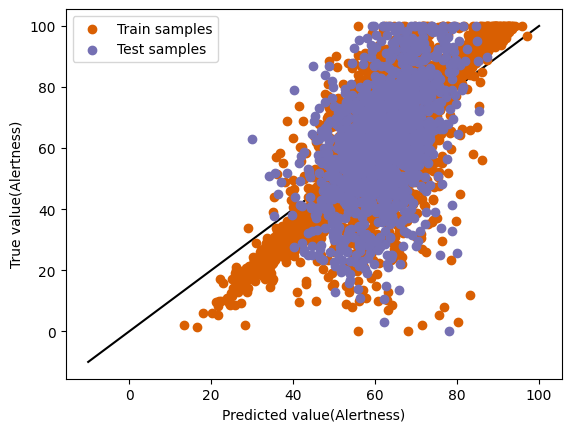

In [27]:
import matplotlib.pyplot as plt
plt.scatter(train_predictions, y_train, label="Train samples", c="#d95f02")
plt.scatter(test_predictions, y_val, label="Test samples", c="#7570b3")
plt.xlabel("Predicted value(Alertness)")
plt.ylabel("True value(Alertness)")
plt.plot([-10, 100], [-10, 100], c="k", zorder=0)
plt.legend()


plt.show()